In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1 (毛亦嘉 检查：黄家乐)
<font size = 4 color = black face = "Times New Roman">
    
This problem can be divided into two parts:
1. Solve the following ordinary differential equations with initial-value problem.
$$
    \begin{aligned}
    \frac{dr}{dt}&=2r -\alpha rf, \;r(0) = r_0,\\
    \frac{df}{dt}&=-f + \alpha rf, \;f (0) = f_0\end{aligned} 
    $$  
Here, we use **the rk4 method** to solve the differential equations.
    
2. Find $t_p$, which satisified 
 $$
    \begin{aligned}
    r(t + t_p) = r(t), \;f (t + t_p) = f (t)
    \end{aligned}
    $$
Though the defination for $t_p$ is the time when both populations return to their original values, since the solution itself is peridoic, we can use the time difference of neighbouring maximum values of $r(t)$ or $f(t)$
As for this part, we use the **the slope between two neighbouring points, once the slope becomes 0 or the slope changes its the sign from positive to negative, we treat this point as the maximum value**, in all the three problems, we choose $f(t)$ as our target.

In [147]:
# Define the function to find tp
def tp_finder(f,t,sectionA,sectionB,t_step = 0.01): 
# f is the value of f(t), sectionA and sectionB  corresponds to the range of the location of two neighbouring maximization.
# Assume t starts from 0 with step size t_step, f(t) and t corresponds to each other.    
# The input of sectionA(B) should take the form [1,2]   
    a,b = sectionA
    c,d = sectionB
    slope_last = 0
    for i_a in range(int(a/0.01),int(b/0.01)):
        slope = (f[i_a+1]-f[i_a])/0.01
        if slope == 0 or slope*slope_last < 0:
            t_a = t[i_a]
            break
        slope_last = slope
    for i_b in range(int(c/0.01),int(d/0.01)):
        slope = (f[i_b+1]-f[i_b])/0.01
        if slope == 0 or slope*slope_last < 0:
            t_b = t[i_b]
            break
        slope_last = slope   
    tp = abs(t_a-t_b)   
    return tp

In [148]:
# Derive drive function
def f(rf,t,alpha=0.01):
    r,f = rf
    r_n = 2*r-alpha*r*f
    f_n = -f+alpha*r*f
    return np.array([r_n,f_n])

<font size = 4 color = black face = "Times New Roman">
(1)     

In [149]:
dt = 0.01
t = np.arange(0, 5*np.pi+dt, dt)
y = np.zeros((len(t),2))
y0  = np.array([300,150])

In [150]:
# rk4 method
y[0] = y0
for n in range(0, len(t) - 1):
    k1 = np.array(f(y[n], t[n]))
    k2 = np.array(f(y[n] + 0.5*dt*k1, t[n] + 0.5*dt))
    k3 = np.array(f(y[n] + 0.5*dt*k2, t[n] + 0.5*dt))
    k4 = np.array(f(y[n] + dt*k3, t[n] + dt))
    y[n+1] = y[n] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6

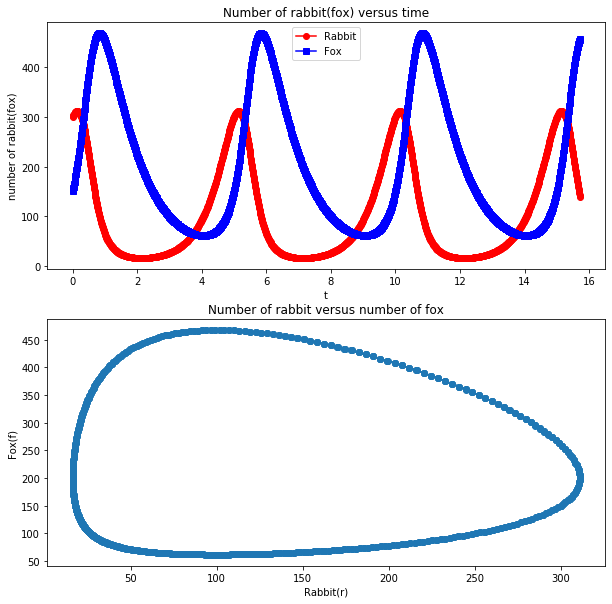

In [151]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
rabbit =ax[0].plot(t,y[:,0],'ro-',label = 'Rabbit')
fox = ax[0].plot(t,y[:,1],'-bs',label = 'Fox')
ax[0].set_xlabel('t')
ax[0].set_ylabel('number of rabbit(fox)')
ax[0].set_title('Number of rabbit(fox) versus time')
ax[0].legend()

ax[1].plot(y[:,0],y[:,1],'-o')
ax[1].set_xlabel('Rabbit(r)')
ax[1].set_ylabel('Fox(f)')
ax[1].set_title('Number of rabbit versus number of fox')
plt.show()

<font size = 4 color = black face = "Times New Roman">
From the plots above we can find that the neighbouring maximum value of the number of the fox(choose the first two values) lie in the section $[0,2]$ and $[5,7]$. 

In [152]:
# Use the solution to the number of fox
tp_finder(y[:,1],t,[0,2],[5,7]) 

5.0

<font size = 4 color = black face = "Times New Roman"> We can find that the period $t_p \approx 5$ in this case, which is the value shown in this problem.

(2)

In [153]:
dt = 0.01
t = np.arange(0, 5*np.pi+dt, dt)
y = np.zeros((len(t),2))
y0  = np.array([15,22])

In [154]:
y[0] = y0
for n in range(0, len(t) - 1):
    k1 = np.array(f(y[n], t[n]))
    k2 = np.array(f(y[n] + 0.5*dt*k1, t[n] + 0.5*dt))
    k3 = np.array(f(y[n] + 0.5*dt*k2, t[n] + 0.5*dt))
    k4 = np.array(f(y[n] + dt*k3, t[n] + dt))
    y[n+1] = y[n] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6

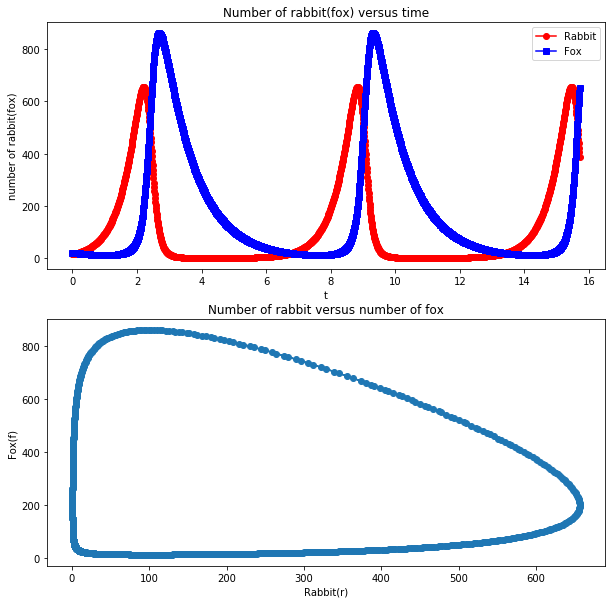

In [155]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
rabbit =ax[0].plot(t,y[:,0],'ro-',label = 'Rabbit')
fox = ax[0].plot(t,y[:,1],'-bs',label = 'Fox')
ax[0].set_xlabel('t')
ax[0].set_ylabel('number of rabbit(fox)')
ax[0].set_title('Number of rabbit(fox) versus time')
ax[0].legend()

ax[1].plot(y[:,0],y[:,1],'-o')
ax[1].set_xlabel('Rabbit(r)')
ax[1].set_ylabel('Fox(f)')
ax[1].set_title('Number of rabbit versus number of fox')
plt.show()

<font size = 4 color = black face = "Times New Roman">
From the plots above we can find that the neighbouring maximum value of the number of the fox(choose the first two values) lie in the section $[2,4]$ and $[4,8]$. 

In [156]:
# Use the solution to the number of fox
tp_finder(y[:,1],t,[0,4],[4,8]) 

6.62

<font size = 4 color = black face = "Times New Roman"> We can find that the period $t_p \approx 6.62$ in this case, which is the value shown in this problem.

<font size = 4 color = black face = "Times New Roman"> (3)

In [157]:
dt = 0.01
t = np.arange(0, 5*np.pi+dt, dt)
y = np.zeros((len(t),2))
y0  = np.array([102,198])

In [158]:
y[0] = y0
for n in range(0, len(t) - 1):
    k1 = np.array(f(y[n], t[n]))
    k2 = np.array(f(y[n] + 0.5*dt*k1, t[n] + 0.5*dt))
    k3 = np.array(f(y[n] + 0.5*dt*k2, t[n] + 0.5*dt))
    k4 = np.array(f(y[n] + dt*k3, t[n] + dt))
    y[n+1] = y[n] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6

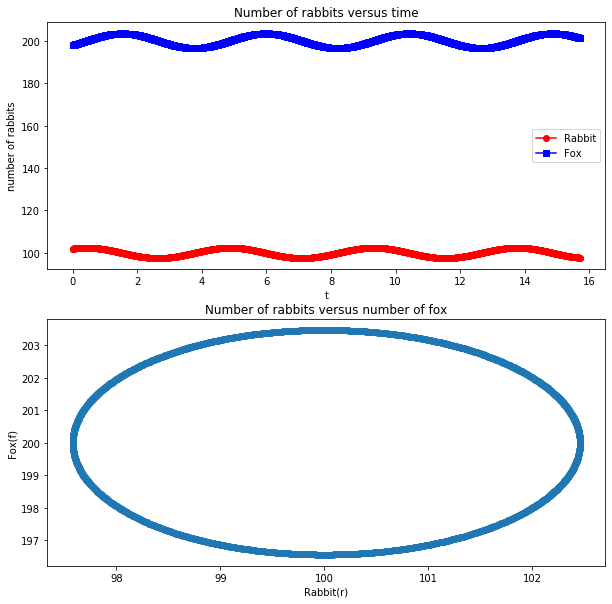

In [159]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
rabbit =ax[0].plot(t,y[:,0],'ro-',label = 'Rabbit')
fox = ax[0].plot(t,y[:,1],'-bs',label = 'Fox')
ax[0].set_xlabel('t')
ax[0].set_ylabel('number of rabbits')
ax[0].set_title('Number of rabbits versus time')
ax[0].legend()

ax[1].plot(y[:,0],y[:,1],'-o')
ax[1].set_xlabel('Rabbit(r)')
ax[1].set_ylabel('Fox(f)')
ax[1].set_title('Number of rabbits versus number of fox')
plt.show()

<font size = 4 color = black face = "Times New Roman">
    
From the plots above we can find that the neighbouring maximum value of the number of the fox(choose the **second and third** two values) lie in the section $[0,4]$ and $[4,8]$. 

In [160]:
# Use the solution to the number of fox
tp_finder(y[:,1],t,[0,4],[4,8]) 

4.44

<font size = 4 color = black face = "Times New Roman"> We can find that the period $t_p \approx 4.44$ in this case.

### Problem 2 —— 黄家乐

<font size = 4 color = black face = "Times New Roman">To solve this problem, firstly, we should derive some equations.


From the Newton's secnd law, we have:
$$
\begin{align}
\frac{d^2x}{dt^2} = & -\frac{F_{G,x}}{M_E} = -\frac{GM_S x}{r^3}(1 + \frac{\alpha}{r^2})\\
\frac{d^2y}{dt^2} = & -\frac{F_{G,y}}{M_E} = -\frac{GM_S y}{r^3}(1 + \frac{\alpha}{r^2})\\
\end{align}
$$
Hence we can write each of the second-order differential equations as two first-order differential equations:
$$
\begin{align}
\frac{dx}{dt} = &  v_x\\
\frac{dy}{dt} = &  v_y\\
\frac{dv_x}{dt} = & -\frac{GM_S x}{r^3}(1 + \frac{\alpha}{r^2})\\
\frac{dv_y}{dt} = & -\frac{GM_S y}{r^3}(1 + \frac{\alpha}{r^2})\\
\end{align}
$$
Then we can using Euler-Cromer method to solve the equations:
$$
\begin{align}
r_i^2 = & (x_i^2+y_i^2)\\
x_{i+1} = & x_i + v_{x,i}\Delta t \\
y_{i+1} = & y_i + v_{y,i}\Delta t \\
v_{x,i+1} = & v_{x,i} - \frac{GM_S x_i}{r_i^3}(1 + \frac{\alpha}{r^2})\Delta t \\
v_{y,i+1} = & v_{y,i} - \frac{GM_S y_i}{r_i^3}(1 + \frac{\alpha}{r^2})\Delta t 
\end{align}
$$
What is more we have known that chhoosing yr and AU as the time and length units. It can be shown that:
$$
GM_S = 4\pi^2AU^3/yr^2
$$
And uing the conservation of both energy and angular momentum over the course of an orbit. We can get:
$$
v_{min} = \sqrt{\frac{GM_S(1-e)}{a(1+e)}}
$$
For this problem $a = 0.39, e = 0.206, r_1  =  (1+e)a = 0.47$

In [3]:
import numpy as np
from math import pi,atan
import matplotlib.pyplot as plt

In [4]:
# Define a class to solve this problem
class Mecury():

    # Define the initial value
    def __init__(self,a=0.39, r = 0.47, e = 0.206, alpha = 0.01):
        self.vx_list = [0]
        self.vy_list = [8.2]
        self.x_list = [r]
        self.y_list = [0]
        self.t_list = [0]
        self.r_list = [r]
        self.alpha = alpha

        # Define the farthest points' data

        self.x_m = []
        self.y_m = []
        self.t_m = []
    
    # Define the Euler-Cromer iterate.
    def EC_iterater(self,dt):
        self.r = (self.x**2+self.y**2)**0.5
        self.vx = self.vx - 4*pi**2*self.x/self.r**3*(1+self.alpha/self.r**2)*dt
        self.vy = self.vy - 4*pi**2*self.y/self.r**3*(1+self.alpha/self.r**2)*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        self.t = self.t + dt

    # Define the Euler-Cromer method's main code.
    def EC_calculate(self,dt = 0.00000001,N = 10000):
        self.vx =  self.vx_list[0]
        self.vy = self.vy_list[0]
        self.x = self.x_list[0]
        self.y = self.y_list[0]
        self.t = 0
        self.t1 = 0
        while self.t < 10:
            self.EC_iterater(dt)
            self.x_list.append(self.x)
            self.y_list.append(self.y)
            self.t_list.append(self.t)
            self.r_list.append(self.r)
            # The try_except is used to find the fastest points.
            try:
                if (self.r_list[-2] 
                > self.r_list[-1]) and (self.r_list[-2] > self.r_list[-3]):
                    self.x_m.append(self.x_list[-2])
                    self.y_m.append(self.y_list[-2])
                    self.t_m.append(self.t_list[-2])
            # At first we don't have enough Index so this error will happen, to confirm the code to run right, we should append this part.
            except IndexError:
                continue
        
    # Define a function to calculate precession's angles.
    def angles(self):
        self.theta_list = []
        self.theta = 0
        self.theta_1 = 0
        for x, y in zip(self.x_m,self.y_m):
            if x >= 0 and y >= 0:
               self.theta_1 = atan(y / x) * 180 / pi 
                
            elif x > 0 and y < 0:
                self.thta_1 = (2 * pi + atan(y / x)) * 180 / pi 
                
            else:
                self.theta_1 = (pi + atan(y / x)) * 180 / pi 
            
            self.theta += self.theta_1 
            self.theta_list.append(self.theta)

    # Define the plot function.
    def plotMecury(self,show = True):
        self.EC_calculate()
        self.angles()
        rate, y0 = np.polyfit(self.t_m , self.theta_list, 1)# Do the least square fit to get the rate.
        if show :
            fig = plt.figure(figsize = (10,10))
            ax1 = fig.add_subplot(211)
            ax2 = fig.add_subplot(212)
            ax1.plot(self.x_list,self.y_list)
            ax1.set_title('Simulation of the Precession of Mercury')
            ax1.set_xlabel('x/AU')
            ax1.set_ylabel('y/AU')
            # Draw the lines from the origin to the points on each orbit that are farthest from the sun.
            for x, y in zip(self.x_m, self.y_m):
                ax1.plot([0, x], [0, y])

            ax2.plot(self.t_m, self.theta_list, 'o', label = 'points')
            t = np.arange(0, 10 , 0.0001)
            ax2.plot(t, rate * t + y0 , label = 'linear_fit')
            ax2.set_title(rf"$\alpha={self.alpha}$, linear fit")
            ax2.set_xlabel("t/yr")
            ax2.set_ylabel(r"$(\theta)$degrees")
            ax2.legend()

            print("Precession rate:%.1f degrees/yr" %rate)
        else:
            return rate

Precession rate:713.6 degrees/yr


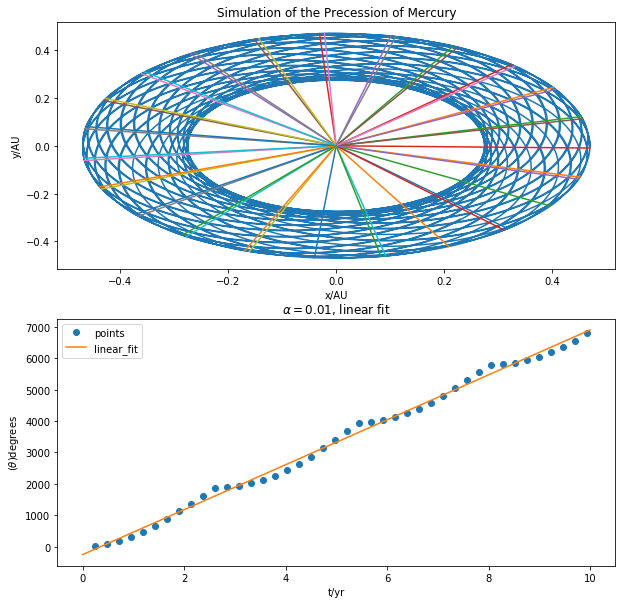

In [4]:
a = Mecury(alpha = 0.01)
a.plotMecury()

Hence when $\alpha = 0.01$ ,the Precession rate is 713.6 degrees/yr

<font size = 4 color = black face = "Times New Roman">Repeat the calculation with different values of and obtain the best-fit precession rate in each case. We then plot the precession rate as a function of . We can find that the precession rate varies linearly with and we can determine the coefficient of proportionality by using the least -square fit. The precession rate of Mercury can be extrapolated
with $\alpha = 1.1 \times 10^{-8} AU^2$

In [5]:
Alpha = np.arange(0,0.001,0.0001)
Rate = np.zeros_like(Alpha)

In [6]:
for i in range(len(Alpha)):
    Rate[i] = Mecury(alpha = Alpha[i]).plotMecury(show = False)

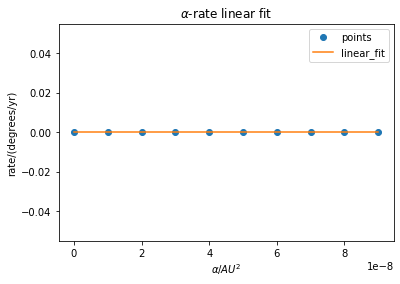

In [7]:
rate_r, y_r = np.polyfit(Alpha , Rate, 1)
plt.plot(Alpha, Rate, 'o', label = 'points')
plt.plot(Alpha, y_r + rate_r * Alpha, label = 'linear_fit')
plt.title(r'$\alpha$-rate linear fit')
plt.xlabel(r'$\alpha/AU^2$')
plt.ylabel('rate/(degrees/yr)')
plt.legend()
plt.show()

We know from this graph that when $\alpha$ is very small, the fitted line will be negative, but our knowledge of reality and our calculations tell us that the rate of precession cannot be negative. So taht, when $\alpha = 1.1 \times 10^{-8}$ , to calculate its rate, we will use this equation :$rate = C\alpha $, where $C$ is the coefficient from the least square method

In [13]:
alpha = 1.1 * 10 ** (-8)
rate_mecury_arcsecond = ( rate_r * alpha) * 3600 * 100
real_date = 556
relative_error = abs(real_date - rate_mecury_arcsecond) / real_date * 100
rate_r

160355.90784470856

In [168]:
print(f'The precession of the perihelion of Mercury that we calculate is {rate_mecury_arcsecond:.0f} arcsecond.\nWith relative error is {relative_error:.1f}%')

The precession of the perihelion of Mercury that we calculate is 635 arcsecond.
With relative error is 14.2%


<font size=6 color=red> 误差太大了，可以采用不同的方法、步长去比较误差的大小，也可以通过计算alpha=0时是否有进动，或者多选取几个周期看总能量是否守恒来评估算法的正确性。

In [2]:
print(2.42e-06 * 3600 *100 * 180 / 3.14)


49.94140127388535


### Problem 3——洪图

In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [170]:
def f(y, t):
    return (99 * t + 1) * np.exp(-t) - 100 * y

def f_exact(t):
    return np.exp(-100*t) + t * np.exp(-t)

In [171]:
h1 = 0.1
t1 = np.arange(0, 1.1, 0.1)
y1 = np.zeros(len(t1))
y_exact1 = np.zeros(len(t1))
y1[0] = 1
for i in range(len(t1) - 1):
    y1[i + 1] = y1[i] + h1 * f(y1[i], t1[i])
for i in range(len(t1)):
    y_exact1[i] = f_exact(t1[i])

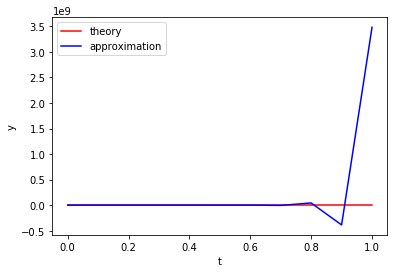

In [172]:
plt.plot(t1, y_exact1,label ='theory' ,color = 'r')
plt.plot(t1, y1,label = 'approximation',color = 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('theory and approximation')
plt.show()

<font size = 4 color = black face = "Times New Roman">We found that the result is ridiculous... Before we discuss the result, let's narrow the region of y. The region in the picture above is too wide.

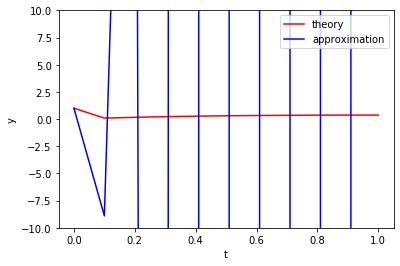

In [173]:
plt.plot(t1, y_exact1,label = 'theory',color = 'r')
plt.plot(t1, y1,label = 'approximation',color = 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(-10, 10)
plt.legend()
plt.title('theory and approximation')
plt.show()

<font size = 4 color = black face = "Times New Roman">In this picture, I think we can see the problem more clearly. So the result is bad because we use the derivative of the last point to calculate the next function value, but the derivative of $x=0$ is so big ($y'(0) = -99$) and we make the interval $h = 0.1$ which is too large. So we get that $y(0.1) = -8.9$. This error becomes bigger and bigger during calculation because in $f(t, y)$ we have one term $-100y$.

In [174]:
h2 = 0.01
t2 = np.arange(0, 5+h2, h2)
y2 = np.zeros(len(t2))
y_exact2 = np.zeros(len(t2))
y2[0] = 1
for i in range(len(t2) - 1):
    y2[i+1] = y2[i] + h2*f(y2[i], t2[i])
for i in range(len(t2)):
    y_exact2[i] = f_exact(t2[i])

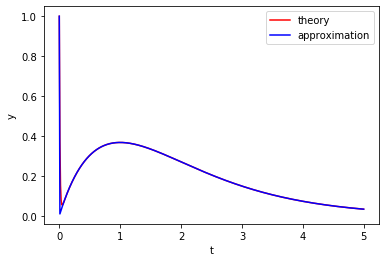

In [175]:
plt.plot(t2, y_exact2,label = 'theory',color = 'r')
plt.plot(t2, y2,label = 'approximation',color = 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('theory and approximation')
plt.show()

<font size = 4 color = black face = "Times New Roman">I think the picture is beautiful enough. But we can still find a fly in the ointment when $t$ is small. Let's enlarge the picture.

(0, 0.2)

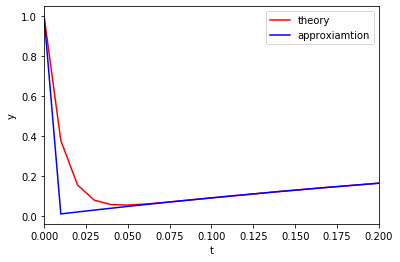

In [176]:
plt.plot(t2, y_exact2,label ='theory' ,color = 'r')
plt.plot(t2, y2,label = 'approxiamtion',color = 'b')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.xlim(0, 0.2)
plt.title('theory and approximation')
plt.show()

<font size = 4 color = black face = "Times New Roman">So the problem happens at $t = 0.01$, that' because the $y'(0)$ is so large, which we have just discussed above.

<font size = 4 color = black face = "Times New Roman">Let's have a summary. In this problem the exact solution is $y = e^{-100t} + te^{-t}$. When $t$ is small the derivative is very large because of the first term, this may make our result bad if we choose a big $h$. When $t$ becomes bigger, the first term and its derivative are very little, so the solution become stable.

### Problem 4——洪图

<font size = 4 color = black face = "Times New Roman">In this problem I use the frame of the sample program and I modify some details in the functions to make the program more reasonable.

<font size = 4 color = black face = "Times New Roman">(1)

In [177]:
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def drive_func(x, y):
    dydx = np.array([y[1], 2*y[1] - y[0] + x**2 - 1])
    return dydx

In [179]:
def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)

    while abs(x_L- x_R) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)

    return x_M

In [180]:
def rk4(f, y0, x):
    y = np.zeros((len(x),2))
    y[0] = y0
    for i in range(len(x) - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + k1*h/2)
        k3 = f(x[i] + h/2, y[i] + k2*h/2)
        k4 = f(x[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h / 6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [181]:
def solve_ode(alpha):
    y0 = 5
    y0 = np.array([y0,alpha])   
    y = rk4(drive_func,y0,x)
    return y

In [182]:
def root_func(alpha): # alpha: y'(0)
    yL = 10
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

In [183]:
def plot_root_func(ax):
    alphas = np.linspace(-10,10,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()
    ax.set_xlabel('alpha')

In [184]:
def shoot_bisection():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(10,7))
    plot_root_func(ax[0])
    
    tol = 0.5e-4
    alpha = bisection(root_func,-8,8,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('$y^{\prime\prime}=2y^\prime-y+x^2-1, y(0) = 5, y(1) = 10$')

In [185]:
h = 0.05
xlow = 0
xhigh = 1
x = np.arange(xlow,xhigh+h,h)

3.9999847412109375


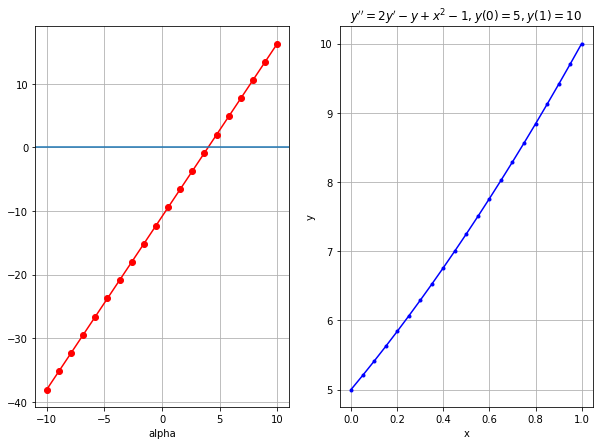

In [186]:
shoot_bisection()

<font size = 4 color = black face = "Times New Roman">We get $\alpha = 4.0$. Let's put it in the function solve_ode() to get the approximation result.

In [187]:
def f_exact(x):
    return x**2 + 4*x + 5

In [188]:
solution = solve_ode(4.0)
y_cal = solution[::,0]
y_exact = f_exact(x)

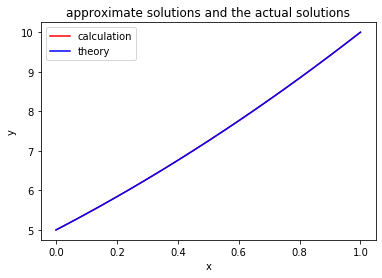

In [189]:
plt.plot(x, y_cal,label = 'calculation',color = 'r')
plt.plot(x, y_exact,label = 'theory',color = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approximate solutions and the actual solutions')
plt.legend()

<font size = 4 color = black face = "Times New Roman">The result fits the theory well.

<font size = 4 color = black face = "Times New Roman">(2)

<font size = 4 color = black face = "Times New Roman">The method is similar to (1)

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [191]:
def drive_func(x, y):
    dydx = np.array([y[1], -(1/x)*y[1] - (1-1/(4*x**2))*y[0]])
    return dydx

In [192]:
def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)

    while abs(x_L - x_R) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)

    return x_M

In [193]:
def rk4(f, y0, x):
    y = np.zeros((len(x),2))
    y[0] = y0
    for i in range(len(x) - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + k1*h/2)
        k3 = f(x[i] + h/2, y[i] + k2*h/2)
        k4 = f(x[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h / 6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [194]:
def solve_ode(alpha):
    y0 = 1
    y0 = np.array([y0,alpha])   
    y = rk4(drive_func,y0,x)
    return y

In [195]:
def root_func(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

In [196]:
def plot_root_func(ax):
    alphas = np.linspace(-10,10,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()
    ax.set_xlabel('alpha')

In [197]:
def shoot_bisection():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(10,7))
    plot_root_func(ax[0])
    
    tol = 0.5e-4
    alpha = bisection(root_func,-8,8,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('$y^{\prime\prime}=(1/x)y^\prime+(1-1/(4x^2))y, y(1) = 1, y(6) = 0$')

In [198]:
h = 0.05
xlow = 1
xhigh = 6
x = np.arange(xlow,xhigh+h,h)

-0.2041778564453125


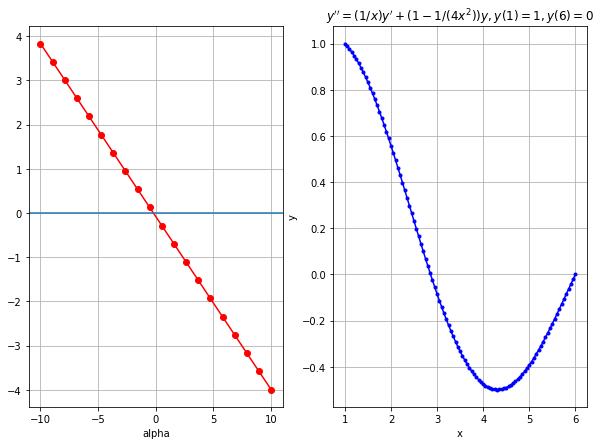

In [199]:
shoot_bisection()

In [200]:
def f_exact(x):
    return (0.2913843206*np.cos(x)+1.001299385*np.sin(x))/np.sqrt(x)

In [201]:
solution = solve_ode(-0.2041778564453125)
y_cal = solution[::,0]
y_exact = f_exact(x)

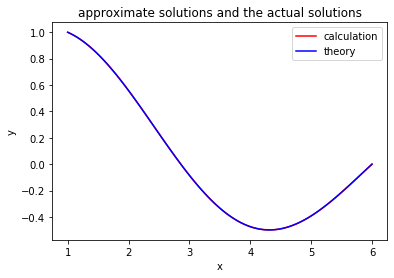

In [202]:
plt.plot(x, y_cal,label = 'calculation',color = 'r')
plt.plot(x, y_exact,label = 'theory',color = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approximate solutions and the actual solutions')
plt.legend()

<font size=7 color=red> 8.5 points.......有离散点的图一点要描点，期末考试会扣分。